In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np;

In [3]:
df = pd.read_csv('ising1.dat')
dfcorr = pd.read_csv('corr.csv')
dfcorr1 = pd.read_csv('corr1.csv')

<AxesSubplot:xlabel='t', ylabel='mag'>

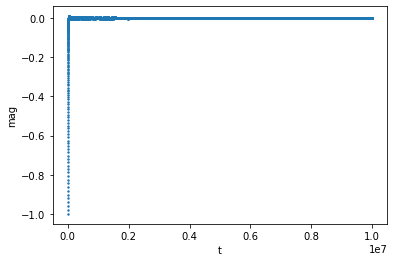

In [4]:
df.plot.scatter('t', 'mag', 2)

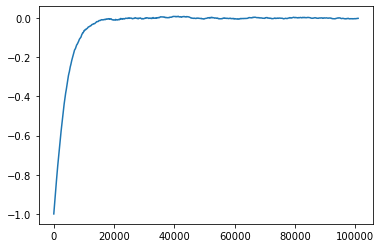

In [5]:
x = df['t'][:1000]
y = df['mag'][:1000]
plt.plot(x,y)

# New ising script

In [24]:
erg = pd.read_csv('erg.csv', names=['t', 'erg'])
mag = pd.read_csv('mag.csv', names=['t', 'mag'])
acorr = pd.read_csv('acorr.csv', names=['t', 'acorr'])

<AxesSubplot:xlabel='t', ylabel='mag'>

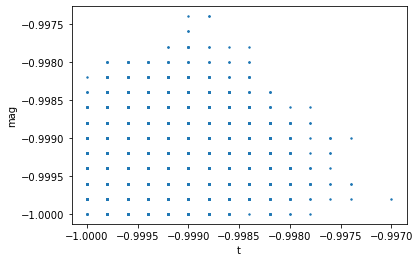

In [25]:
mag.plot.scatter('t', 'mag', 2)

<AxesSubplot:xlabel='t', ylabel='erg'>

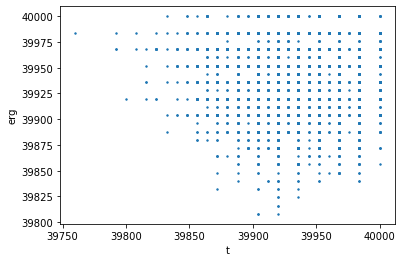

In [26]:
erg.plot.scatter('t', 'erg', 2)

<AxesSubplot:xlabel='t', ylabel='acorr'>

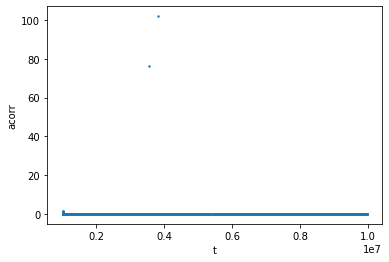

In [27]:
acorr.plot.scatter('t', 'acorr', 2)

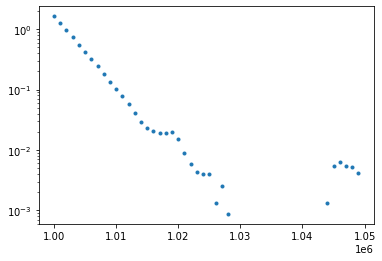

In [28]:
plt.plot(acorr['t'][:50], acorr['acorr'][:50], '.')
plt.yscale('log')

# Yay

In [3]:
#mag = pd.read_csv('mag.csv', names=['t', '03', '06', '09', '12', '15', '18', '21', '24', '27', '30', '33', '36', '39']).dropna()
#erg = pd.read_csv('erg.csv', names=['t', '03', '06', '09', '12', '15', '18', '21', '24', '27', '30', '33', '36', '39']).dropna()
corr = pd.read_csv('corr.csv', names=['t', '03', '06', '09', '12', '15', '18', '21', '24', '27', '30', '33', '36', '39'])
#corr.replace([np.inf, -np.inf], np.nan, inplace=True)
#corr.dropna(inplace=True)
mag = pd.read_csv('mag.csv', names=['t', '04', '06', '08', '10', '12', '14', '15', '16', '17', '18', '20', '22', '24', '28', '30', '34']).dropna()
erg = pd.read_csv('erg.csv', names=['t', '04', '06', '08', '10', '12', '14', '15', '16', '17', '18', '20', '22', '24', '28', '30', '34']).dropna()

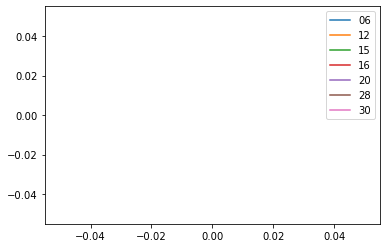

In [4]:
fig, ax = plt.subplots()
for temp in ['06', '12', '15', '16', '20', '28', '30']:
    ax.plot(mag['t'][1000:], mag[temp][1000:], label=temp)
#plt.xlim([0,10])
#plt.ylim([-0.2, 0.02])
plt.legend()
plt.show()
magvals = np.asarray(mag[1000:].mean(axis=0)[1:])
magerrs = np.asarray(mag[1000:].std(axis=0)[1:])

In [229]:
np.size(magerrs)

16

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


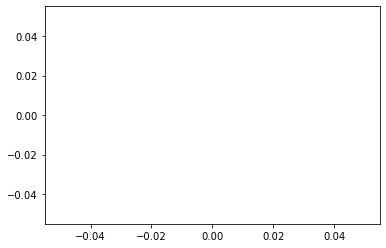

In [257]:
temps = [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 2.0, 2.2, 2.4, 2.8, 3.0, 3.4]
#magvals

plt.figure()
plt.errorbar(temps, magvals, yerr=magerrs, marker='.', fmt=' ')
plt.show()

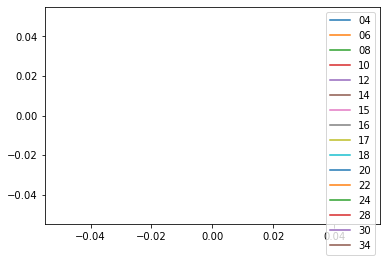

In [258]:
fig, ax = plt.subplots()
for temp in ['04', '06', '08', '10', '12', '14', '15', '16', '17', '18', '20', '22', '24', '28', '30', '34']:
    ax.plot(erg['t'], erg[temp], label=temp)
#plt.xlim([100000,120000])
plt.legend()
plt.show()

In [237]:
9900/100

99.0

In [253]:
ergsqs = []
ergs = []
for temp in ['04', '06', '08', '10', '12', '14', '15', '16', '17', '18', '20', '22', '24', '28', '30', '34']:
    sample_mean = []
    pop = erg[100:][temp]
    for _ in range(99):
        sample_n = np.random.choice(pop, size=100)
        sample_mean.append(sample_n.mean())
    ergsqs.append(np.average(np.asarray(sample_mean)**2))
    ergs.append(np.average(sample_mean))

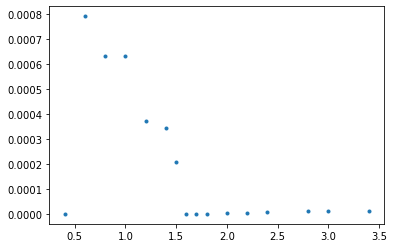

In [254]:
betas = 1./np.asarray(temps)
c = betas**2/10000*(ergsqs-np.asarray(ergs)**2)
plt.plot(temps, c, '.')

temperature =  06
6.01258167469471


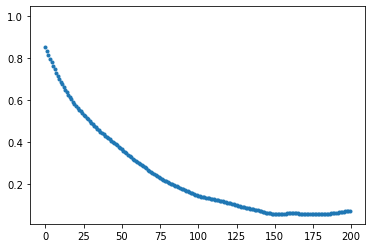

temperature =  08
19.420589635431615


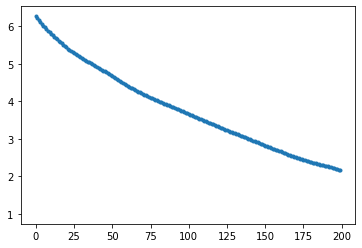

temperature =  10
-9891979730.225742


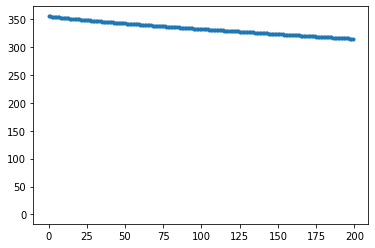

temperature =  12
-1842050125.6144438


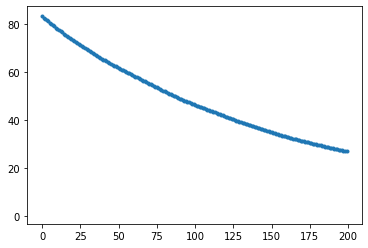

temperature =  14
-480596671.38606876


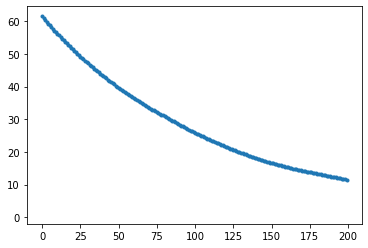

temperature =  15
4.737363664260089


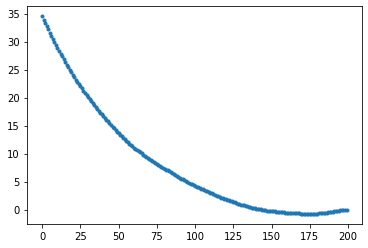

temperature =  16
0.8735043698399225


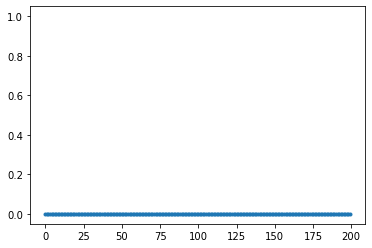

temperature =  17
1.1577003984025032


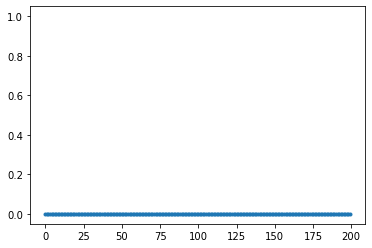

temperature =  18
0.8717616759087305


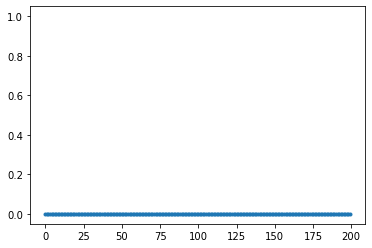

temperature =  20
1.134697230101876


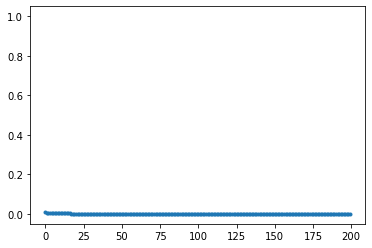

temperature =  22
1.442971600876003


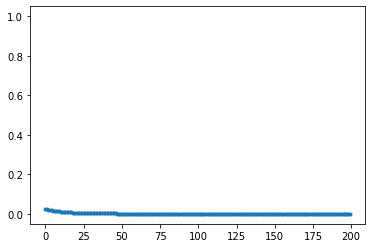

temperature =  24
1.6265548847217324


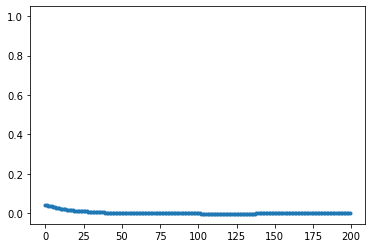

temperature =  28
2.44111208411236


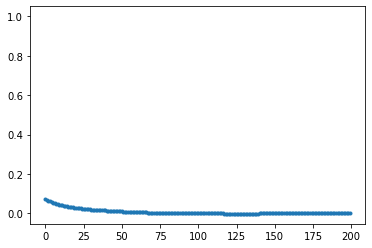

temperature =  30
2.2536995708300096


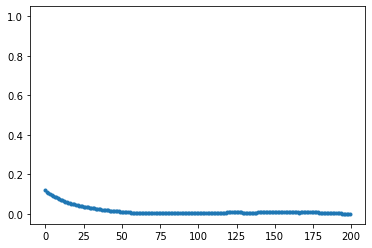

temperature =  34
2.204603863170422


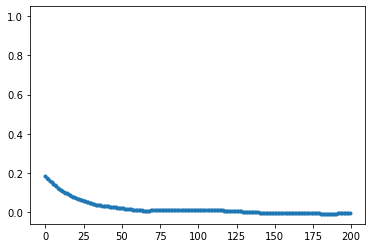

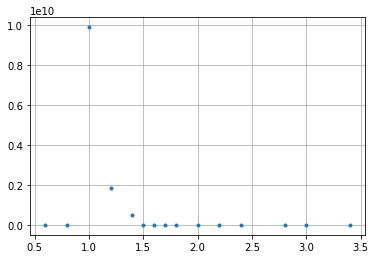

In [200]:
def expf(x, a, b):
    return a*np.exp(-x/b)
corrt = []
#for temp in ['06']:
#for temp in ['06', '08', '10', '12', '14', '15', '16', '17', '18', '20', '22', '24', '28', '30', '34']:
    print('temperature = ', temp)
    a = mag[temp] - mag[temp].mean()
    corr = np.correlate(a, a, mode='full')
    corr = corr[corr.size//2:]
    #popt, pcov = curve_fit(expf, mag['t'][:200], corr[:200], p0=[mag[temp][0], 20])
    #corrt.append(popt[1])
    #print(popt[1])
    #plt.figure()
    #plt.plot(corr[:200], '.', 1)
    #plt.plot(mag['t'], expf(mag['t'], *popt))
    #plt.yscale('log')
    plt.show()
plt.figure()
plt.plot(temps[1:], np.abs(corrt), '.')
plt.grid()
plt.show()

In [203]:
erg

t       04       06       08       10       12       14       15  \
0       0.0  40000.0  40000.0  40000.0  40000.0  40000.0  40000.0  40000.0   
1       0.1  40000.0  39744.0  39600.0  39344.0  39168.0  39072.0  38440.0   
2       0.2  40000.0  39488.0  39216.0  38752.0  38312.0  38088.0  37192.0   
3       0.3  40000.0  39248.0  38832.0  38320.0  37584.0  37400.0  35912.0   
4       0.4  40000.0  39064.0  38552.0  37928.0  37112.0  36208.0  34776.0   
...     ...      ...      ...      ...      ...      ...      ...      ...   
9995  999.5  40000.0  34784.0  30176.0  24264.0  18160.0  16240.0  13552.0   
9996  999.6  40000.0  34784.0  29984.0  24072.0  18120.0  16416.0  13200.0   
9997  999.7  40000.0  34720.0  29952.0  24160.0  17976.0  16424.0  13016.0   
9998  999.8  40000.0  34624.0  29808.0  24104.0  18288.0  16432.0  13104.0   
9999  999.9  40000.0  34904.0  30056.0  24184.0  18424.0  16352.0  13280.0   

           16       17       18       20       22       24       28       30  \
0     40000.0  40000.0  40000.0  40000.0  40000.0  40000.0  40000.0  40000.0   
1     40000.0  40000.0  40000.0  39984.0  39968.0  39904.0  39936.0  39776.0   
2     40000.0  40000.0  40000.0  39968.0  39936.0  39824.0  39888.0  39632.0   
3     40000.0  40000.0  40000.0  39968.0  39872.0  39808.0  39784.0  39488.0   
4     40000.0  40000.0  39984.0  39968.0  39792.0  39728.0  39656.0  39392.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
9995  40000.0  40000.0  39952.0  39736.0  39464.0  39136.0  38552.0  37776.0   
9996  40000.0  40000.0  39968.0  39728.0  39432.0  39080.0  38592.0  37584.0   
9997  40000.0  40000.0  39952.0  39744.0  39392.0  39064.0  38608.0  37600.0   
9998  40000.0  40000.0  39968.0  39744.0  39424.0  39096.0  38656.0  37520.0   
9999  40000.0  40000.0  39968.0  39712.0  39448.0  39088.0  38672.0  37480.0   

           34  
0     40000.0  
1     39888.0  
2     39656.0  
3     39552.0  
4     39360.0  
...       ...  
9995  37168.0  
9996  37088.0  
9997  37216.0  
9998  37208.0  
9999  37288.0  

[10000 rows x 17 columns]

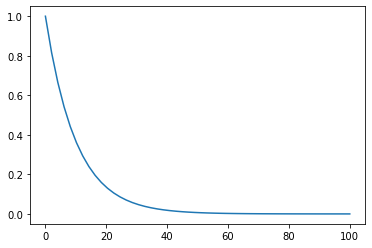

In [181]:
x = np.linspace(0, 100)
plt.plot(x, expf(x, 1, 10))

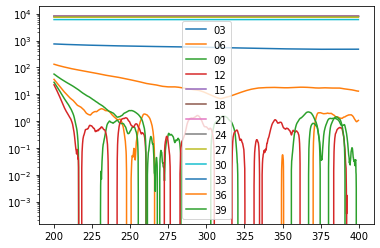

In [71]:
def linear (x, a, b):
    return a*x+b
fig, ax = plt.subplots()
coeffs = []
for temp in ['03', '06', '09', '12', '15', '18', '21', '24', '27', '30', '33', '36', '39']:
    popt, pcov = curve_fit(linear, corr['t'], np.log(np.abs(corr[temp])))
    coeffs.append(-1/popt[0])
    ax.plot(corr['t'], corr[temp], label=temp)
#plt.xlim([100000,100010])
#plt.ylim([0,1000])
plt.yscale('log')
plt.legend()
plt.show()

In [64]:
coeffs

[23044474.865328398,
 0.018579364428011374,
 0.025767305052833048,
 0.01904135650393951,
 11927.613195139313,
 815.3392191775366,
 -1205.3764765190583,
 187.8323872362966,
 41.288116971647554,
 -4.685500447361848,
 0.04366834945625113,
 0.0112065599488292,
 0.0059396706950857695]

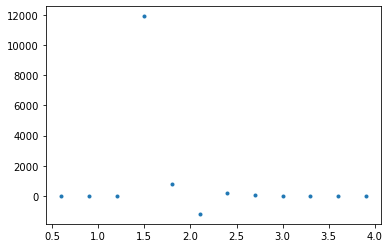

In [68]:
x = [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9]
plt.plot(x[1:], coeffs[1:], '.')

# Hey

In [5]:
mag = pd.read_csv('mag.csv')
erg = pd.read_csv('erg.csv')
corr = pd.read_csv('corr.csv')

In [7]:
mag

0  -0.12  -0.03125  -0.1  0.0138889  -0.055  0.00333333  0.0196875  \
0       0.1   0.04  -0.03125  0.00   0.000000  -0.030   -0.003333   0.020938   
1       0.2   0.12   0.03125 -0.02   0.041667  -0.030    0.000556   0.023125   
2       0.3  -0.04  -0.03125  0.06   0.027778   0.010    0.000000   0.018750   
3       0.4  -0.04   0.03125 -0.02   0.000000   0.015    0.000556   0.010313   
4       0.5   0.12   0.03125  0.04   0.013889   0.025   -0.015000   0.012500   
...     ...    ...       ...   ...        ...     ...         ...        ...   
9995  999.6   0.04   0.00000 -0.02  -0.041667   0.000    0.007778  -0.009062   
9996  999.7  -0.04   0.03125 -0.04  -0.041667  -0.005    0.004444  -0.004687   
9997  999.8   0.04   0.09375  0.00  -0.013889   0.020    0.007222  -0.005625   
9998  999.9  -0.04  -0.03125 -0.02   0.000000  -0.040    0.010000  -0.000937   
9999    NaN    NaN       NaN   NaN        NaN     NaN         NaN        NaN   

      -0.008  
0    -0.0122  
1    -0.0140  
2    -0.0042  
3    -0.0066  
4     0.0010  
...      ...  
9995  0.0008  
9996 -0.0030  
9997 -0.0006  
9998 -0.0020  
9999     NaN  

[10000 rows x 9 columns]

<AxesSubplot:>

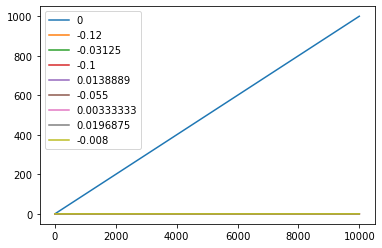

In [6]:
mag.plot()

# Lol

In [13]:
mag = pd.read_csv('mag.csv', names=['t', '5', '8', '10', '12', '20', '60', '80', '100']).dropna()
erg = pd.read_csv('erg.csv', names=['t', '5', '8', '10', '12', '20', '60', '80', '100']).dropna()
corr = pd.read_csv('corr.csv', names=['t', '5', '8', '10', '12', '20', '60', '80', '100']).dropna()

In [14]:
mag

t     5        8    10        12     20        60        80     100
0       0.0 -0.12 -0.03125 -0.10  0.013889 -0.055  0.003333  0.019688 -0.0080
1       0.1  0.04 -0.03125  0.00  0.000000 -0.030 -0.003333  0.020938 -0.0122
2       0.2  0.12  0.03125 -0.02  0.041667 -0.030  0.000556  0.023125 -0.0140
3       0.3 -0.04 -0.03125  0.06  0.027778  0.010  0.000000  0.018750 -0.0042
4       0.4 -0.04  0.03125 -0.02  0.000000  0.015  0.000556  0.010313 -0.0066
...     ...   ...      ...   ...       ...    ...       ...       ...     ...
9995  999.5  0.04 -0.03125  0.00  0.027778 -0.015 -0.001111 -0.005000 -0.0050
9996  999.6  0.04  0.00000 -0.02 -0.041667  0.000  0.007778 -0.009062  0.0008
9997  999.7 -0.04  0.03125 -0.04 -0.041667 -0.005  0.004444 -0.004687 -0.0030
9998  999.8  0.04  0.09375  0.00 -0.013889  0.020  0.007222 -0.005625 -0.0006
9999  999.9 -0.04 -0.03125 -0.02  0.000000 -0.040  0.010000 -0.000937 -0.0020

[10000 rows x 9 columns]

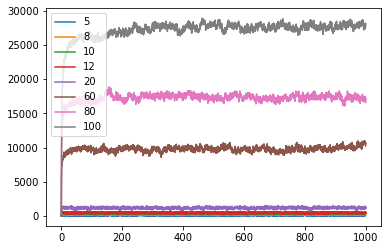

In [15]:
fig, ax = plt.subplots()
for size in ['5', '8', '10', '12', '20', '60', '80', '100']:
    ax.plot(erg['t'], erg[size], label=size)
#plt.xlim([100000,120000])
plt.legend()
plt.show()

size =  100
4.9444319833240125e-45 0.005788298420624668 0.5535030917063581


/usr/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


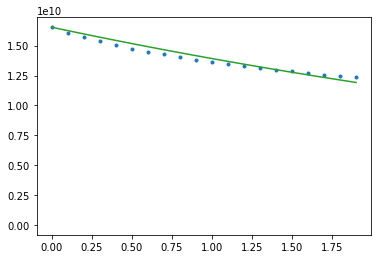

In [7]:
def expf(x, a, b, x0):
    return a*np.exp(-(x-x0)/b)
def linear (x, a, b):
    return a*x+b
corrt = []
sizesn = np.asarray([5, 8, 10, 12, 20, 60, 80, 100])
#for temp in ['06']:
#for temp in ['06', '08', '10', '12', '14', '15', '16', '17', '18', '20', '22', '24', '28', '30', '34']:
#for size in ['5', '8', '10', '12', '20', '60', '80', '100']:
for size in ['100']:
    print('size = ', size)
    a = erg[size] - erg[size].mean()
    corr = np.correlate(a, a, mode='full')
    corr = corr[corr.size//2:]
    popt, pcov = curve_fit(expf, erg['t'][:20], corr[:20], p0=[corr[0], 0.004, 1])
    #corrt.append(popt[0])
    print(popt[0], popt[1], popt[2])
    plt.figure()
    plt.plot(erg['t'][:20], corr[:20], '.', 1)
    #plt.plot(erg['t'][:20], expf(erg['t'][:20], 6e8, 0.25))
    x = erg['t'][:20]
    #x = np.arange(0,1000)
    plt.plot(x, expf(x, corr[0]+2e7, 5.8, 0))
    #plt.yscale('log')
    plt.show()
#plt.figure()
#plt.plot(sizesn, np.abs(corrt), '.')
#plt.yscale('log')
#plt.grid()
#plt.show()

[ 0.05048097 -2.87908456]


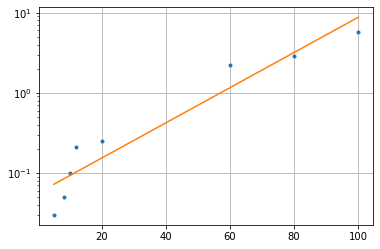

In [8]:
corrt=np.asarray([3e-2, 5e-2, 0.1, 0.21, 0.25, 2.2, 2.9, 5.8])
popt, pcov = curve_fit(linear, sizesn, np.log(corrt))
print(popt)
plt.figure()
plt.plot(sizesn, (corrt), '.')
plt.plot(sizesn, np.exp(linear(sizesn, *popt)))
plt.yscale('log')
plt.grid()
plt.show()

In [9]:
popt[0]

0.05048096651134071

In [16]:
corr

Empty DataFrame
Columns: [t, 5, 8, 10, 12, 20, 60, 80, 100]
Index: []

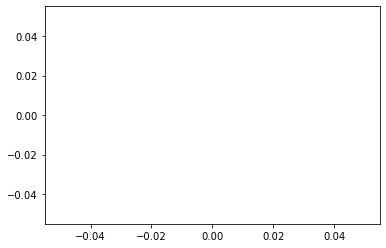

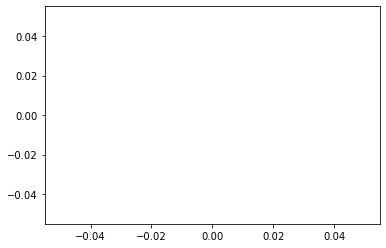

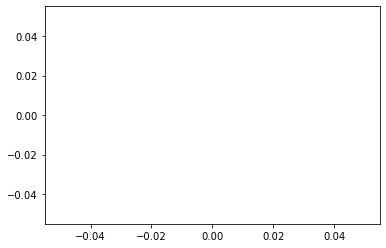

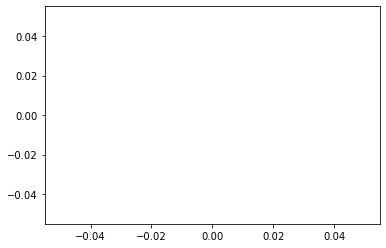

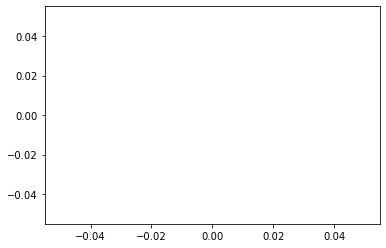

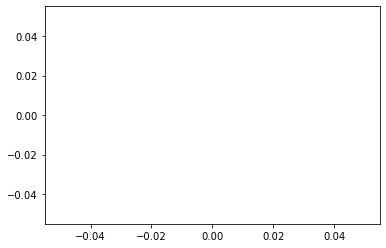

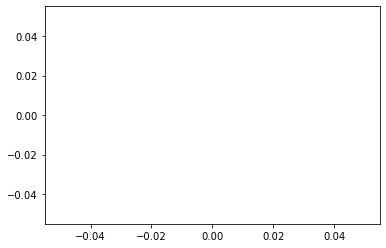

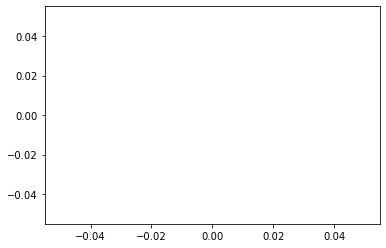

In [17]:
fig, ax = plt.subplots()
for size in ['5', '8', '10', '12', '20', '60', '80', '100']:
    plt.plot(corr['t'], corr[size], label=size)
    plt.show()
#plt.xlim([100000,120000])
#plt.legend()
#plt.show()

In [12]:
plt.plot(corr['t'][:10], corr['20'][:10])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

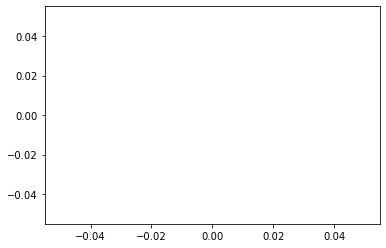

In [18]:
plt.plot(corr['t'][:], corr['60'][:])

1.7209599999999998
1.725
2.22887


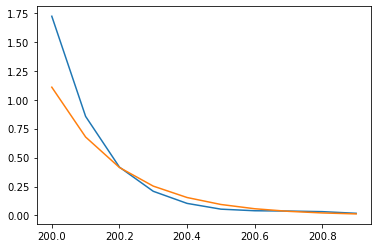

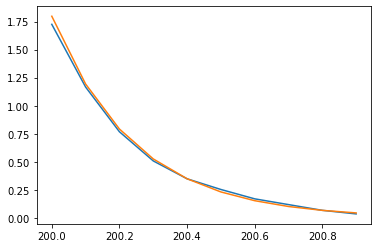

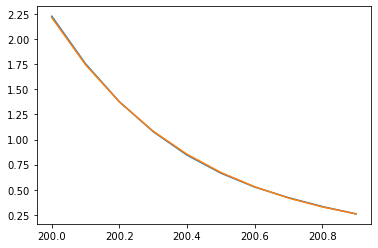

In [450]:
coeffs=[]
#fig, ax = plt.subplots()
#def expf1()
sizes = (['60', '80', '100'])
for size in sizes:
    x = corr['t'][:10]
    #y = np.log(np.ma.array(corr[size][:10], mask=corr[size][:10]>0))
    y = np.log(np.abs(corr[size][:10]))
    print(corr[size][0])
    popt, pcov = curve_fit(linear, x, y, p0=[corr[size][0],-1])
    plt.figure()
    plt.plot(corr['t'][:10], corr[size][:10], label=size)
    plt.plot(corr['t'][:10], np.exp(popt[0]*corr['t'][:10]+popt[1]))
    coeffs.append(popt[0])
    #plt.yscale('log')
corrt = -1./np.asarray(coeffs)

In [451]:
corrt

array([0.2033514 , 0.24420171, 0.41933682])

In [452]:
sizesn = [60, 80, 100]

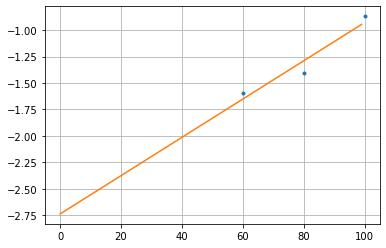

In [454]:
popt, pcov = curve_fit(linear, sizes, np.log(corrt))
plt.plot(sizesn, np.log(corrt), '.')
#plt.plot([0,7], linear([0, 7], *popt))
#plt.plot(np.arange(0, 7), 0.09325285*np.arange(0, 7)+1.20087897)
plt.grid()
plt.plot(np.arange(100), linear(np.arange(100), *popt))
#plt.plot(np.arange(100), 1*np.ones(100))
#plt.yscale('log')

In [455]:
sizes

['60', '80', '100']

In [456]:
popt[0]

0.01809347325717736

In [270]:
corr

t          5         8        10        12        20       60  \
0     200.0  5790.6400  5198.690  4903.010  4733.570  4259.750  3834.30   
1     200.1  3705.1600  4816.130  4723.780  4637.200  4243.900  3833.81   
2     200.2  2429.7100  4519.750  4595.550  4568.320  4231.270  3833.35   
3     200.3  1614.4200  4247.320  4487.680  4508.970  4220.290  3832.90   
4     200.4  1059.7200  3998.060  4388.270  4460.760  4210.340  3832.47   
...     ...        ...       ...       ...       ...       ...      ...   
1994  399.4   -35.0176   489.401  -456.602  -859.422  -883.299  3664.27   
1995  399.5    77.6448   489.359  -457.829  -858.458  -886.859  3664.23   
1996  399.6   165.5360   488.513  -461.258  -857.314  -890.479  3664.18   
1997  399.7   238.2850   493.441  -467.923  -856.936  -894.811  3664.14   
1998  399.8   163.4240   492.170  -473.874  -856.782  -898.621  3664.10   

           80      100  
0     3436.95  3886.88  
1     3436.62  3886.55  
2     3436.31  3886.22  
3     3436.01  3885.90  
4     3435.71  3885.58  
...       ...      ...  
1994  3392.27  3709.59  
1995  3392.33  3709.57  
1996  3392.39  3709.56  
1997  3392.44  3709.55  
1998  3392.50  3709.55  

[1999 rows x 9 columns]

# Lol2

In [19]:
x = [60, 80, 100]
y = [0.2034, 0.2442, 0.4193]

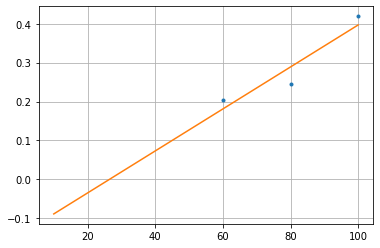

In [29]:
popt, pcov = curve_fit(linear, x, y)
plt.figure()
plt.plot(x, y, '.')
plt.plot(np.asarray([10, 100]), linear(np.asarray([10, 100]), *popt))
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.show()

In [31]:
sizes = np.asarray([2, 5, 10, 20, 30, 60, 80, 100])
linear(sizes, *popt)

array([-0.13203833, -0.11584583, -0.08885833, -0.03488333,  0.01909167,
        0.18101667,  0.28896667,  0.39691667])

# Lol3

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mag = pd.read_csv('mag.csv', names=['t', '5', '8', '10', '12']).dropna()
erg = pd.read_csv('erg.csv', names=['t', '5', '8', '10', '12']).dropna()
corr = pd.read_csv('corr.csv', names=['t', '5', '8', '10', '12']).dropna()

In [3]:
mag

t     5        8    10        12
0          0.000000 -0.20  0.12500  0.02 -0.083333
1          0.694444  0.20  0.00000  0.02  0.083333
2          1.388890  0.12  0.00000  0.02 -0.013889
3          2.083330 -0.04  0.00000 -0.02 -0.013889
4          2.777780  0.04  0.12500  0.02  0.027778
...             ...   ...      ...   ...       ...
99995  69441.000000 -0.12  0.00000  0.06 -0.027778
99996  69441.700000 -0.04  0.00000 -0.02 -0.055556
99997  69442.400000  0.04  0.03125 -0.06 -0.041667
99998  69443.100000  0.04 -0.06250  0.02 -0.083333
99999  69443.800000 -0.04 -0.03125 -0.02  0.013889

[100000 rows x 5 columns]

In [4]:
erg

t     5      8     10     12
0          0.000000   4.0  -16.0    0.0  -40.0
1          0.694444  36.0   72.0   96.0  104.0
2          1.388890  28.0  128.0  136.0   88.0
3          2.083330  52.0  184.0  168.0  200.0
4          2.777780  60.0  112.0  208.0  232.0
...             ...   ...    ...    ...    ...
99995  69441.000000  52.0  224.0  264.0  544.0
99996  69441.700000  28.0  232.0  304.0  480.0
99997  69442.400000  44.0  216.0  272.0  528.0
99998  69443.100000  44.0  184.0  272.0  464.0
99999  69443.800000  28.0  208.0  216.0  432.0

[100000 rows x 5 columns]

In [5]:
corr

t            5             8            10            12
0      6944.44  200963000.0  3.422270e+09  8.095930e+09  1.642450e+10
1      6945.14  188022000.0  3.379440e+09  8.048370e+09  1.637270e+10
2      6945.83  187772000.0  3.356910e+09  8.018850e+09  1.633800e+10
3      6946.53  187762000.0  3.342090e+09  7.998020e+09  1.631180e+10
4      6947.22  187727000.0  3.331230e+09  7.981860e+09  1.629150e+10
...        ...          ...           ...           ...           ...
9994  13884.70  187667000.0  3.285340e+09  7.879350e+09  1.608160e+10
9995  13885.40  187531000.0  3.285340e+09  7.879400e+09  1.608160e+10
9996  13886.10  187591000.0  3.285110e+09  7.879340e+09  1.608180e+10
9997  13886.80  187662000.0  3.285240e+09  7.879980e+09  1.608190e+10
9998  13887.50  187587000.0  3.285050e+09  7.880300e+09  1.608230e+10

[9999 rows x 5 columns]

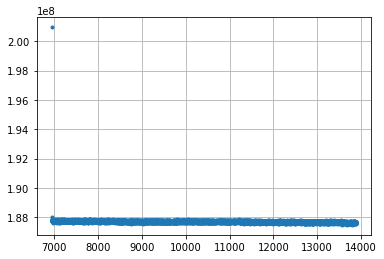

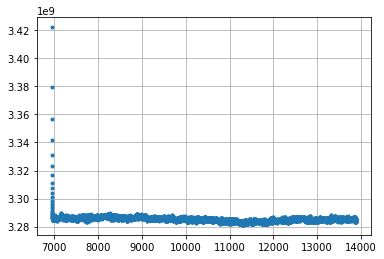

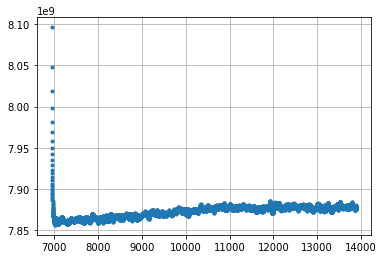

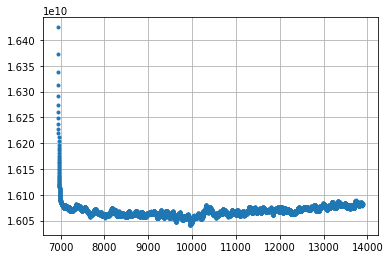

In [8]:
for size in ['5', '8', '10', '12']:
    plt.figure()
    plt.plot(corr['t'], corr[size], '.')
    plt.grid()
    plt.show()